In [5]:
import pixiedust
!pip install --upgrade ~/Development/repos/tradeframework
#!pip install --upgrade ~/Development/repos/quantutils

# import utilities
from quantutils.api.datasource import MarketDataStore
from quantutils.api.auth import CredentialsStore
import quantutils.dataset.pipeline as ppl

#import tradeframework
from tradeframework.api import Derivative, Optimizer, Model, TradeEnvironment, TradeEngine, Asset
from tradeframework.environments import SandboxEnvironment, ZiplineEnvironment
from tradeframework.models import PreOpenMomentum

# Development
import pandas as pd
import numpy as np

%matplotlib inline

Processing /home/cwilkin/Development/repos/tradeframework


  Created wheel for tradeframework: filename=tradeframework-1.0.0-py3-none-any.whl size=18884 sha256=dbebf9e01cb496479e66cdc62b9c8ab2c9d84e5a8f115ff9efcd72215493a3cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-11fk9r12/wheels/cd/32/a1/a8c2e3a15d787df32664b93c9905578d63f6a1505878f20b22
Successfully built tradeframework
  Attempting uninstall: tradeframework
    Found existing installation: tradeframework 1.0.0
    Uninstalling tradeframework-1.0.0:
      Successfully uninstalled tradeframework-1.0.0
You should consider upgrading via the '/home/cwilkin/Development/anaconda/envs/dev/bin/python -m pip install --upgrade pip' command.


In [19]:
from tradeframework.api import Model

asset1 = Asset("DOW", pd.read_csv('../unittest/data/testData1.csv', parse_dates=True, index_col=0, dayfirst=True))

# Calculate returns via TradeFramework
env = SandboxEnvironment("TradeFair")
p = env.createPortfolio("MyPortfolio", optimizer=env.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
p.addModel(env.createModel("MeanReversion", "Test-MeanReversion"))
for i in range(len(asset1.values)):
    dInfo = env.append(Asset("DOW", asset1.values[i:i + 1]))

# Compare returns to correct values
np.allclose(dInfo.returns["Open"].values.flatten(), [0., 0., 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1])

True

In [15]:
dInfo.returns["Open"].values

array([0. , 0. , 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1])

array([-20.      ,  -8.      , -17.6     ,  -7.04    , -15.488   ,
        -6.1952  , -13.62944 ,  -5.451776])

In [3]:
## Get Market Data

mds = MarketDataStore("../../../marketinsights-data/datasources")

assets = {
    "markets": ["DOW"],
    "start": "2013-01-01",
    "end": "2018-08-01"
}

#assets = {
#    "markets": ["DOW"],
#    "start": "2013-01-01",
#    "end": "2018-08-01"
#}

markets = mds.loadMarketData(assets, "H")
ts = ppl.removeNaNs(markets["DOW"])
ts.index = ts.index.tz_convert("US/Eastern")

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Loading DOW data from WallSt-hourly in tradefair.hdf
Resampling to H periods
Resampling to H periods
Resampling to H periods
Merging data...
Loading DOW data from D&J-IND in finam.hdf
Resampling to 5min periods
Resampling to H periods
Resampling to H periods
Merging data...


In [4]:
ts

,Open,High,Low,Close
Date_Time,,,,
2013-01-02 10:00:00-05:00,13366.48,13374.82,13338.68,13345.45
2013-01-02 11:00:00-05:00,13345.60,13353.75,13321.64,13321.77
2013-01-02 12:00:00-05:00,13321.76,13339.25,13320.28,13326.66
2013-01-02 13:00:00-05:00,13326.64,13336.06,13322.51,13329.19
2013-01-02 14:00:00-05:00,13329.09,13339.82,13318.19,13331.80
2013-01-02 15:00:00-05:00,13331.83,13395.20,13331.83,13395.20
2013-01-03 10:00:00-05:00,13381.66,13395.66,13376.42,13391.14
2013-01-03 11:00:00-05:00,13391.18,13413.73,13391.16,13408.19
2013-01-03 12:00:00-05:00,13408.16,13420.65,13402.45,13419.40


In [4]:
import quantutils.core.timeseries as tsUtils
import tradeframework.utils.trader as trader

class TwoStdDev(Model):
    def __init__(self, name, env, start=None, end=None):
        Model.__init__(self, name, env)
        self.start = start
        self.end = end
        self.env
        return
    
    def getSignals(self, context, assetInfo):
        
        signals = pd.DataFrame(np.zeros((len(assetInfo.values), 2)), index=assetInfo.values.index, columns=["bar","gap"])
        
        ret =  np.log((trader.getPeriodReturns(assetInfo.returns) + 1))
        
        ma = pd.DataFrame(tsUtils.MA(ret, 20, 10), ret.index)
        std = pd.DataFrame(tsUtils.MStd(ret, 20, 10), ret.index)
        b1 = ma + 2*std
        b2 = ma - 2*std
        
        signals["bar"][(ret > b1[0]) | (ret<b2[0])] = np.sign(ret[(ret > b1[0]) | (ret<b2[0])])
        signals = signals.shift(1)
        signals.iloc[0] = 0
        
        return signals

In [19]:
#%%pixie_debugger
bEnv = SandboxEnvironment("TradeFair")
b = bEnv.createPortfolio("Baseline", optimizer=bEnv.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
b.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold", args=("15:00", "16:00")))
#p.addModel(MeanReversion("MR-BL", bEnv, "12:00", "13:00" ))
#p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold"))
baseline = bEnv.append(Asset("DOW", ts)).assets[0]

In [20]:
env = SandboxEnvironment("TradeFair")

#opt = env.createOptimizer("KellyOptimizer", "KellyOpt", opts={"window":20*24, "weight":.05})
opt = env.createOptimizer("EqualWeightsOptimizer", "EqualWeights")#, opts={"weight":4.0})
p = env.createPortfolio("MyPortfolio", optimizer=opt)

#p.addModel(RetraceDailyMove("RDM1", env, "12:00", "13:00" ))
#p.addModel(RetraceDailyMove("RDM2", env, "13:00", "14:00" ))
#p.addModel(RetraceDailyMove("RDM3", env, "14:00", "15:00" ))
#p.addModel(RetraceDailyMove("RDM4", env, "15:00", "16:00" ))

#p.addModel(env.createModel( "MeanReversion", "MR1", args=("15:00", "16:00" )))
#p.addModel(MeanReversion("MR2", env, "10:00", "11:00" ))
#p.addModel(MeanReversion("MR3", env, "11:00", "12:00" ))
#p.addModel(MeanReversion("MR4", env, "12:00", "13:00" ))
#p.addModel(MeanReversion("MR5", env, "13:00", "14:00" ))
#p.addModel(MeanReversion("MR6", env, "14:00", "15:00" ))
#p.addModel(MeanReversion("MR7", env, "15:00", "16:00" ))
#p.addModel(TwoStdDev("SD", env))

#p.addModel(env.createModel( "PreOpenMomentum", "D1-PreOpenMomentum" ))

p.addModel(env.createModel( "BuyAndHold", "D2-BuyAndHold" ))

#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold7", args=("09:00", "10:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold6", args=("10:00", "11:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold5", args=("11:00", "12:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold4", args=("12:00", "13:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold3", args=("13:00", "14:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold2", args=("14:00", "15:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold1", args=("15:00", "16:00")))

#p.addModel(env.createModel( "SellAndHold", "D4-SellAndHold", args=("15:00", "16:00")))
threshold = 0
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBootstrap_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '4892e256e17f4fad775119304ee7e6d1', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBootstrap_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '4892e256e17f4fad775119304ee7e6d1', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBoosting_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '83c0ff9eeb24c87dbb0af766ab59ef75', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-BasicBoosting_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '83c0ff9eeb24c87dbb0af766ab59ef75', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', 'f2efe64bbc39ad0880337120f32ca12b', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', 'f2efe64bbc39ad0880337120f32ca12b', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '078df5a1afbaa2290ee93b4a562e3898', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '078df5a1afbaa2290ee93b4a562e3898', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_SwitchedOrder_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', 'bdfa91432d64e63fc528869163a8b3fb', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Bootstrap_SwitchedOrder_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', 'bdfa91432d64e63fc528869163a8b3fb', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_LongRun_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '9a23dcf38b04cccf8a28381ea013dc7f', threshold)))
#p.addModel(env.createModel( "MIBasicModel", "ML-OneStepAhead_Boosting_LongRun_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '9a23dcf38b04cccf8a28381ea013dc7f', threshold)))

#TODO Aggregate multiple training runs as well as datasets
agg = [{
    'training_run_id': 'bdfa91432d64e63fc528869163a8b3fb',
    'datasets': ['4234f0f1b6fcc17f6458696a6cdf5101', '3231bbe5eb2ab84eb54c9b64a8dcea55']
}]

#p.addModel(env.createModel( "MIAggregateModel", "ML-OneStepAhead_Agg", args=(CredentialsStore(), agg, "vote_unanimous_all", threshold)))

# Feed data into the portfolio
#for index in range(0, len(ts)):
#env.handleData(0, ts[:index+1])
#env.append(Asset("DOW", ts)) # TODO this should be "getDerivative" or "backTest"
print("Done")

Done


In [32]:
import random

def generatePrices(open):
    close = open + (random.random() - .5)
    high = max(open, close) + (random.random() / 2)
    low = min(open, close) - (random.random() / 2)
    return [open, high, low, close]

periods = 100
open = 100
prices = []
random.seed(0)
for i in range(0,periods):
    row = generatePrices(open)
    prices.append(row)
    open = row[3]
pd.DataFrame(prices, columns=["Open", "High", "Low", "Close"], index=pd.date_range(start='1/1/2018', periods=periods))

,Open,High,Low,Close
2018-01-01,100.000000,100.723399,99.789714,100.344422
2018-01-02,100.344422,100.600059,99.900872,100.103339
2018-01-03,100.103339,100.538794,99.865040,100.387137
2018-01-04,100.387137,100.924576,100.134794,100.470519
2018-01-05,100.470519,100.848421,99.943173,100.252357
2018-01-06,100.252357,100.707230,99.511471,100.002863
2018-01-07,100.002863,100.764164,99.847790,100.313081
2018-01-08,100.313081,100.992332,99.971089,100.542912
2018-01-09,100.542912,100.593263,100.297969,100.515055
2018-01-10,100.515055,101.082448,100.031752,100.625942


In [22]:
import time

start = time.time()
env.append(Asset("DOW", ts))
end = time.time()
print(end - start)

0.7162981033325195


(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f41d138bda0>)

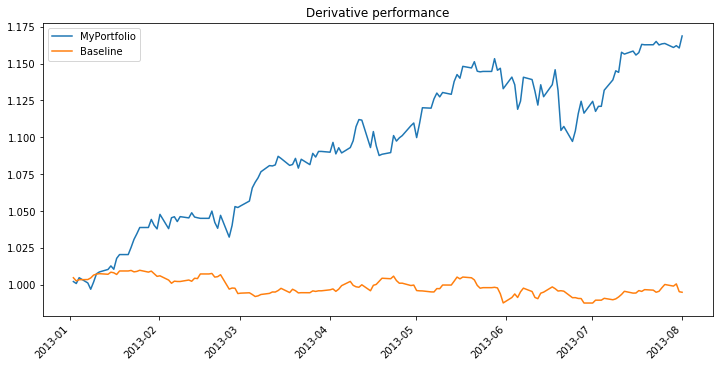

In [31]:
# TODO - EVEN MORE SUSPICIOUS PLOT - Why are Multiple Equally Weight MI signals generating the exact inverse of the baseline
# Sell signal until training period over (2000ish training set)?

import tradeframework.utils.trader as trader
#tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.plot(p, baseline, includeComponents=False, includePrimary=True, log=False)

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f738ae769b0>)

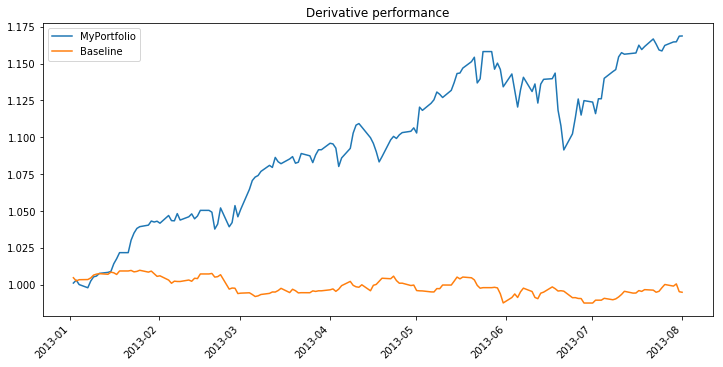

In [6]:
# TODO - EVEN MORE SUSPICIOUS PLOT - Why are Multiple Equally Weight MI signals generating the exact inverse of the baseline
# Sell signal until training period over (2000ish training set)?

import tradeframework.utils.trader as trader
#tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.plot(p, baseline, includeComponents=False, includePrimary=True, log=False)

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9aa5437710>)

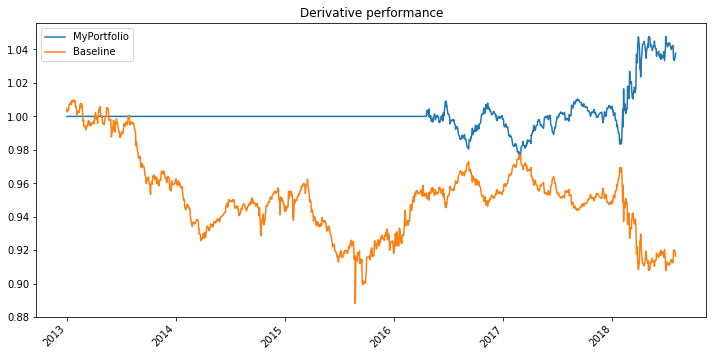

In [14]:
# TODO - EVEN MORE SUSPICIOUS PLOT - Why are Multiple Equally Weight MI signals generating the exact inverse of the baseline
# Sell signal until training period over (2000ish training set)?

import tradeframework.utils.trader as trader
#tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.plot(dInfo.assets[0], baseline, includeComponents=False, includePrimary=True, log=False)

In [15]:
tInfo

TradeFair_Portfolio                             DOW  \
                                      Capital                      Allocation   
                                         Open             Close           bar   
Date_Time                                                                       
2016-04-20 15:00:00-04:00    10000.0000000000  10031.6081035689 -0.5506638252   
2016-04-21 15:00:00-04:00    10031.6081035689  10034.0613102370 -0.5575469700   
2016-04-22 15:00:00-04:00    10034.0613102370  10036.7914244804 -0.5571661721   
2016-04-25 15:00:00-04:00    10036.7914244804  10018.2202082727 -0.5593739822   
2016-04-26 15:00:00-04:00    10018.2202082727  10004.3324288267 -0.5577421464   
2016-04-27 15:00:00-04:00    10004.3324288267   9998.8962262106 -0.5547145527   
2016-04-28 15:00:00-04:00     9998.8962262106  10044.6472956510 -0.5579398712   
2016-04-29 15:00:00-04:00    10044.6472956510   9998.6133731666 -0.5676192661   
2016-05-02 15:00:00-04:00     9998.6133731666   9993.0216515313 -0.5591721635   
2016-05-03 15:00:00-04:00     9993.0216515313  10004.1563761034 -0.5623598269   
2016-05-04 15:00:00-04:00    10004.1563761034   9997.7481811570 -0.5670968979   
2016-05-05 15:00:00-04:00     9997.7481811570   9977.4418504588 -0.5672159413   
2016-05-06 15:00:00-04:00     9977.4418504588   9968.9414994107 -0.5629371555   
2016-05-09 15:00:00-04:00     9968.9414994107   9986.0267136459 -0.5620136262   
2016-05-10 15:00:00-04:00     9986.0267136459   9966.2115073445 -0.5581748254   
2016-05-11 15:00:00-04:00     9966.2115073445   9970.9910603694 -0.5623003559   
2016-05-12 15:00:00-04:00     9970.9910603694   9992.9952628772 -0.5613316966   
2016-05-13 15:00:00-04:00     9992.9952628772   9996.8687597213 -0.5696318888   
2016-05-16 15:00:00-04:00     9996.8687597213  10014.4495357331 -0.5634864106   
2016-05-17 15:00:00-04:00    10014.4495357331  10011.0774940109 -0.5715324953   
2016-05-18 15:00:00-04:00    10011.0774940109   9996.2056777806 -0.5719929319   
2016-05-19 15:00:00-04:00     9996.2056777806   9978.9741084614 -0.5743856440   
2016-05-20 15:00:00-04:00     9978.9741084614   9984.0471293597 -0.5700023481   
2016-05-23 15:00:00-04:00     9984.0471293597  10001.5910822340 -0.5696088596   
2016-05-24 15:00:00-04:00    10001.5910822340  10002.4949510657 -0.5649180198   
2016-05-25 15:00:00-04:00    10002.4949510657  10005.8005608104 -0.5602728381   
2016-05-26 15:00:00-04:00    10005.8005608104  10006.9791664408 -0.5612407764   
2016-05-27 15:00:00-04:00    10006.9791664408   9995.9343687457 -0.5606496292   
2016-05-31 15:00:00-04:00     9995.9343687457   9966.9588485503 -0.5637260738   
2016-06-01 15:00:00-04:00     9966.9588485503   9973.0073381896 -0.5600453370   
...                                       ...               ...           ...   
2018-06-18 15:00:00-04:00    10365.9499114291  10347.6659806158 -0.4155438821   
2018-06-19 15:00:00-04:00    10347.6659806158  10358.3382078603 -0.4185187155   
2018-06-20 15:00:00-04:00    10358.3382078603  10358.3382078603 -0.4200206073   
2018-06-22 15:00:00-04:00    10358.3382078603  10386.2860104660 -0.4202677084   
2018-06-25 15:00:00-04:00    10386.2860104660  10333.7713230245 -0.4304482577   
2018-06-26 15:00:00-04:00    10333.7713230245  10361.5685313061 -0.4243848593   
2018-06-27 15:00:00-04:00    10361.5685313061  10385.3532551661 -0.4285535831   
2018-06-28 15:00:00-04:00    10385.3532551661  10408.4579652611 -0.4278650018   
2018-06-29 15:00:00-04:00    10408.4579652611  10478.0947144762 -0.4259128392   
2018-07-02 15:00:00-04:00    10478.0947144762  10435.2395213700 -0.4328807384   
2018-07-05 15:00:00-04:00    10435.2395213700  10415.7115375655 -0.4291864572   
2018-07-06 15:00:00-04:00    10415.7115375655  10426.3476289158 -0.4254436540   
2018-07-09 15:00:00-04:00    10426.3476289158  10430.9742707295 -0.4206038012   
2018-07-10 15:00:00-04:00    10430.9742707295  10430.3462770949 -0.4186624231   
2018-07-11 15:00:00-04:00    10430.3462770949  10440.2584

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1fa0e9f748>)

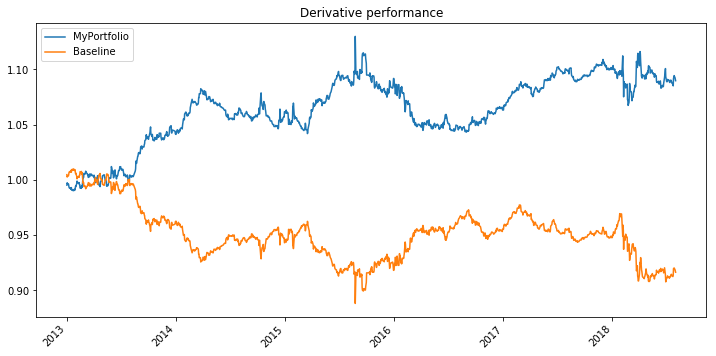

In [37]:
# TODO - SUSPICIOUS PLOT - Why are MI signals generating the exact inverse of the baseline
import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.plot(dInfo.assets[0], baseline, includeComponents=False, includePrimary=True, log=False)

In [10]:
## import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
#fig, ax = trader.plot(dInfo.assets[0], includeComponents=False, includePrimary=False, log=False)

# Add Moving Average
import quantutils.core.timeseries as tsUtils
period = 20
offset = 10
ret =  np.log((trader.getPeriodReturns(baseline.assets[0].returns) + 1))

ma2 = pd.DataFrame(tsUtils.MA(np.cumsum(ret), period, offset), np.cumsum(ret).index)

ma1 = pd.DataFrame(tsUtils.MA(ret, period, offset), ret.index)
ma1.iloc[int(np.ceil(period/2+offset)-1)] =  np.cumsum(ma2).iloc[int(np.ceil(period/2+offset)-1)]

ma3 = pd.DataFrame(EMA(ret, period, offset), ret.index)
ma3.iloc[int(np.ceil(period/2+offset)-1)] = np.cumsum(ma2).iloc[int(np.ceil(period/2+offset)-1)]

# Bollinger Bands
b1 = ma1 + 2*pd.DataFrame(MStd(ret, period, offset), ret.index)
b2 = ma1 - 2*pd.DataFrame(MStd(ret, period, offset), ret.index)

#ax.plot(np.cumsum(ma1), label="MA=20")
#ax.plot(np.cumsum(ma2), 'ro', label="MA=20")
#ax.plot(np.cumsum(ma3), label="EMA=20")
#ax.plot(np.cumsum(ret),label="Return")
#ax.plot(np.cumsum(b1),label="Upper",color='b')
#ax.plot(np.cumsum(b2),label="Lower",color='b')
ax.plot(ret,label="Return")
ax.plot(ma1, label="MA=20")
ax.plot(b1,label="Upper",color='b')
ax.plot(b2,label="Lower",color='b')

signals = pd.DataFrame(np.zeros((len(baseline.assets[0].returns), 2)), index=baseline.assets[0].returns.index, columns=["bar","gap"])
signals["bar"][(ret > b1[0]) | (ret<b2[0])] = np.negative(np.sign(ret[(ret > b1[0]) | (ret<b2[0])]))
signals = signals.shift(1)
signals.iloc[0] = 0
print(signals[:10])

ax.legend(loc='best')
fig.canvas.draw()

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/quantutils/core/timeseries.py:5: FutureWarning: Series.strides is deprecated and will be removed in a future version
  strides = a.strides + (a.strides[-1],)


NameError: name 'MStd' is not defined

In [171]:
s[(ret > b1[0]) | (ret<b2[0])] = ret[(ret > b1[0]) | (ret<b2[0])]
s[(ret > b1[0]) | (ret<b2[0])][:10]

Date_Time
2016-07-06 11:00:00-04:00   -0.0028989199
2016-07-06 12:00:00-04:00   -0.0027498755
2016-07-07 15:00:00-04:00    0.0038070757
2016-07-08 08:00:00-04:00   -0.0042140577
2016-07-10 22:00:00-04:00    0.0036564117
2016-07-12 04:00:00-04:00    0.0022138113
2016-07-12 11:00:00-04:00    0.0020186596
2016-07-13 09:00:00-04:00    0.0021459527
2016-07-14 02:00:00-04:00   -0.0041677510
2016-07-14 05:00:00-04:00    0.0036714130
Name: bar, dtype: float64

In [173]:
ret[(ret > b1[0]) | (ret<b2[0])][:10]

Date_Time
2016-07-06 11:00:00-04:00   -0.0028989199
2016-07-06 12:00:00-04:00   -0.0027498755
2016-07-07 15:00:00-04:00    0.0038070757
2016-07-08 08:00:00-04:00   -0.0042140577
2016-07-10 22:00:00-04:00    0.0036564117
2016-07-12 04:00:00-04:00    0.0022138113
2016-07-12 11:00:00-04:00    0.0020186596
2016-07-13 09:00:00-04:00    0.0021459527
2016-07-14 02:00:00-04:00   -0.0041677510
2016-07-14 05:00:00-04:00    0.0036714130
dtype: float64

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/quantutils/core/timeseries.py:12: RuntimeWarning: invalid value encountered in multiply
  r = np.empty(len(values)) * np.nan


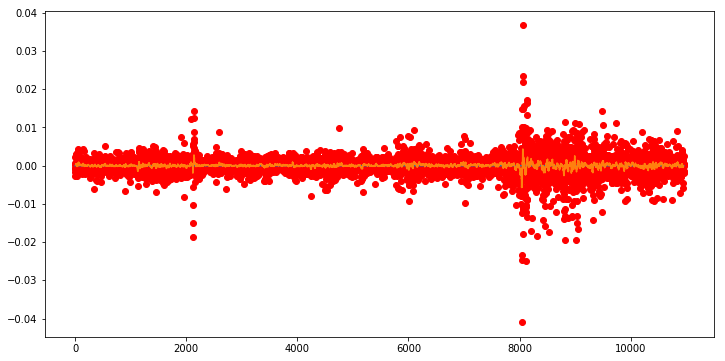

In [48]:
# Returns plot
from matplotlib import pyplot
x = np.diff(tInfo.values[:,0]/10000)
ma = tsUtils.MA(x, 20)
pyplot.plot(x,'ro')
pyplot.plot([0] * len(x))
pyplot.plot(ma)
pyplot.show()

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/quantutils/core/timeseries.py:12: RuntimeWarning: invalid value encountered in multiply
  r = np.empty(len(values)) * np.nan


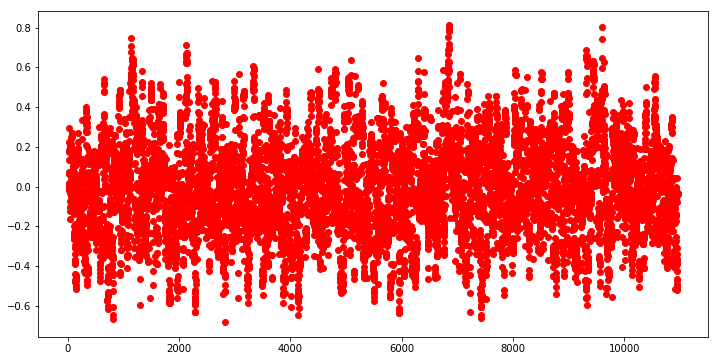

In [49]:
# Moving ACF plot
pyplot.plot(tsUtils.MACF(x, 1, 20, 10), 'ro')
pyplot.show()

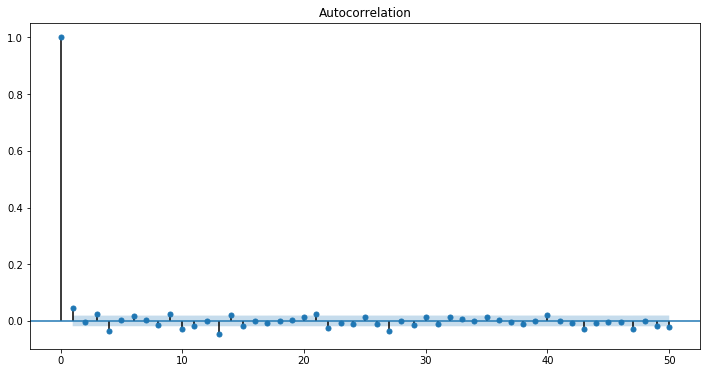

(-21.657623155825704,
 0.0,
 26,
 10932,
 {'1%': -3.430948320175338,
  '5%': -2.861804424408925,
  '10%': -2.566910747983175},
 -109835.06372657401)

In [36]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
plot_acf(x, lags=50)
pyplot.show()
adfuller(x)

In [37]:
import statsmodels.api as sm

# Fit the model
#x = x - x.mean()
mod_data = sm.tsa.MarkovAutoregression(x, k_regimes=2, order=1, trend='nc', switching_variance=True)
res_data = mod_data.fit()

res_data.summary()

/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/numpy/linalg/linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/cwilkin/Development/anaconda/envs/dev/lib/python3.6/site-packages/scipy/stats/

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                     Open   No. Observations:                10958
Model:             MarkovAutoregression   Log Likelihood                     nan
Date:                  Thu, 16 Aug 2018   AIC                                nan
Time:                          10:56:11   BIC                                nan
Sample:                               0   HQIC                               nan
                                - 10958                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2            nan        nan        nan        nan         nan         nan
ar.L1             nan        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2            nan        nan        nan        nan         nan         nan
ar.L1             nan        nan        nan        nan         nan         nan
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]           nan        nan        nan        nan         nan         nan
p[1->0]           nan        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, figsize=(10,7))

bInfo = bEnv.getTradingInfo(context, baseline, startCapital=1)
ax = axes[0]
ax.plot(bInfo.values[:,0])
ax.set(title='MR Strategy')

ax = axes[1]
ax.plot(tInfo.values[:,0]/10000)
ax.set(title='Market')

ax = axes[2]
ax.plot(x, 'ro')
ax.set(title='Returns')

ax = axes[3]
ax.plot(res_data.filtered_marginal_probabilities[0])
ax.set(title='Smoothed probability of a Momentum regime')

ax = axes[4]
ax.plot(res_data.filtered_marginal_probabilities[1])
ax.set(title='Smoothed probability of a Mean Reversion regime')

#ax = axes[4]
#ax.plot(res_data.filtered_marginal_probabilities[2])
#ax.set(title='Smoothed probability of a High Mean Reversion regime')

fig.tight_layout()

In [7]:
from tradeframework.api import Model

asset1 = Asset("DOW", pd.read_csv('../unittest/data/testData1.csv', parse_dates=True, index_col=0, dayfirst=True))

randomSignals = np.array([1, 1, 0, -1, 0, -1, 1, -1, 0])

class RandomModel(Model):

    def getSignals(self, asset):
        signals = pd.DataFrame(np.array([np.zeros(len(asset.values)), randomSignals[:len(asset.values)]]).T, index=asset.values.index, columns=["bar", "gap"])
        return signals

# Calculate returns via TradeFramework
env = SandboxEnvironment("TradeFair")
p = env.createPortfolio("MyPortfolio", optimizer=env.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
p.addModel(RandomModel("SellAndHold", env))

for i in range(len(asset1.values)):
    x = env.append(Asset("DOW", asset1.values[i:i + 1]))

# Calculate returns manually
mRet = randomSignals[:-1] * np.diff(asset1.values["Close"]) / asset1.values["Close"][:-1]

np.allclose(p.returns.values[:, 1][:-1], mRet.values)

True

In [5]:
p.returns

,Open,Close
Date,,
2018-01-01,0.0,-0.2
2018-01-02,0.0,0.1
2018-01-03,0.0,0.0
2018-01-04,0.0,-0.1
2018-01-05,0.0,0.0
2018-01-06,0.0,-0.1
2018-01-07,0.0,-0.2
2018-01-08,0.0,-0.1
2018-01-09,0.0,0.0


In [17]:
p.assets[0].values

,Open,Close
Date,,
2018-01-01,1.000000,1.000000
2018-01-02,0.800000,0.800000
2018-01-03,0.880000,0.880000
2018-01-04,0.880000,0.880000
2018-01-05,0.792000,0.792000
2018-01-06,0.792000,0.792000
2018-01-07,0.712800,0.712800
2018-01-08,0.570240,0.570240
2018-01-09,0.513216,0.513216


In [18]:
asset1.values

,Open,Close
Date,,
2018-01-01,100.000000,100.000000
2018-01-02,80.000000,80.000000
2018-01-03,88.000000,88.000000
2018-01-04,70.400000,70.400000
2018-01-05,77.440000,77.440000
2018-01-06,61.952000,61.952000
2018-01-07,68.147200,68.147200
2018-01-08,54.517760,54.517760
2018-01-09,59.969536,59.969536
